In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.tsa.arima_model import ARMA
from sklearn.model_selection import train_test_split

In [25]:
train = pd.read_csv("input.txt", header=None, names = ["visitors"])

In [26]:
N,_ = train.shape
train["time"] = pd.to_datetime(range(1,N+1), unit='D',
                               origin=pd.Timestamp('2012-01-10'))

In [27]:
train = train.set_index("time")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f788a6ced30>]],
      dtype=object)

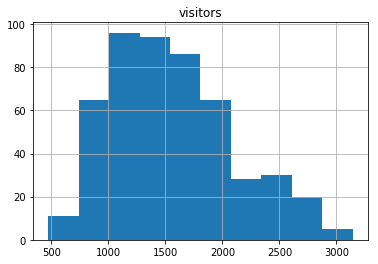

In [28]:
train.hist()

In [7]:
test = train.iloc[N-30:]
train = train.iloc[:N-30]

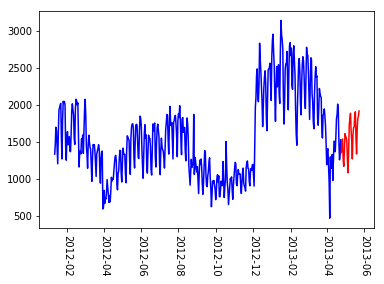

In [17]:
plt.plot(train,'b',test,'r')
plt.xticks(rotation=-90)
plt.show()

In [59]:
model = ARMA(endog=train.visitors[:], order=(2,1,0))

/home/robin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


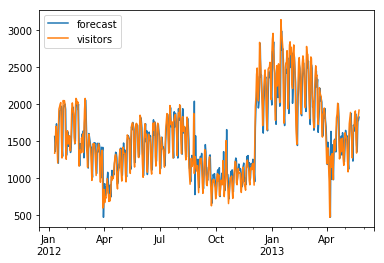

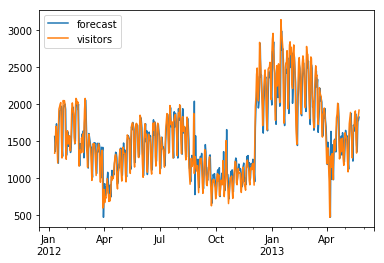

In [60]:
model_fit = model.fit(disp=False)
model_fit.plot_predict()

In [67]:
def armaforcast(data, P=2, D=1, Q=1):
    model = ARMA(data, order=(P,D,Q))
    model_fit = model.fit(disp=False)
    yhat = model_fit.forecast()[0]
    return yhat

In [68]:
## make new vector with all seen data
seendata = [x for x in train.visitors]
predicted = list()

In [69]:
for d in test.visitors:
    # predict next value
    yhat = armaforcast(seendata, 3, 1, 0)
    predicted.append(yhat)
    seendata.append(d)

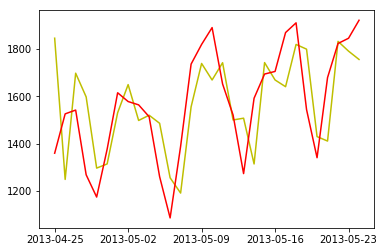

In [70]:
# how did the predictions turn out?
plt.plot(test.index, predicted,'y', test.index, test.visitors,'r')

In [73]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred = predicted, y_true=test.visitors))
print("rmse: ", rmse)

rmse:  188.39129312224497


In [ ]:
# Enter your code here. Read input from STDIN. Print output to STDOUT

import sys
import pandas as pd
import numpy as np

N = int(input())
train = []
for i in range(N):
    train.append(int(input()))
print(train)
#a = int(raw_input())

from statsmodels.tsa.arima_model import ARMA

def armaforcast(data, P=2, D=1, Q=2):
    model = ARMA(data, order=(P,D,Q))
    model_fit = model.fit(disp=False)
    yhat = int(model_fit.forecast()[0])
    return yhat

## make new vector with all seen data
seendata = [x for x in train]
#predicted = list()
horizon = 30
#for dat in train[N-horizon]:
    # predict next value
 #   yhat = armaforcast(seendata, 3, 1, 0)
    #predicted.append(yhat)
   # print(yhat)
  #  seendata.append(dat)
